In [11]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 11,7

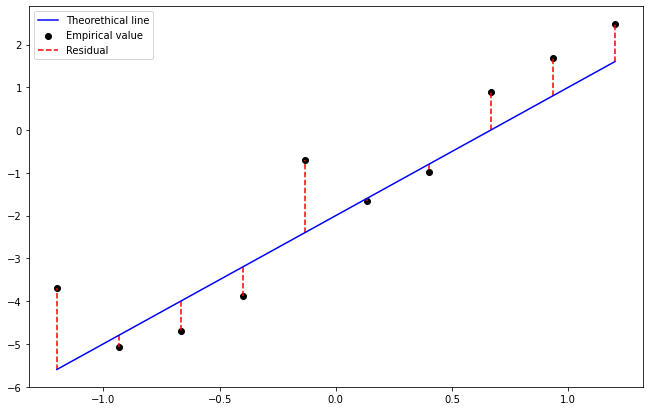

In [13]:
x = np.linspace(-1.2,1.2,10)
y = 3*x - 2
dy = 4*np.random.rand(10)-2
fig, ax = plt.subplots()
ax.plot(x,y, color = 'blue')
ax.scatter(x,y+dy,color='black')
ax.vlines(x,y,y+dy, colors='r', linestyles='--')
ax.legend( ['Theorethical line', 'Empirical value', 'Residual'])
# Комментарии к объектам на ваше усмотрение, Никита Вячеславович.
plt.show()

# Построим прямую, пользуясь методом наименьших квадратов

In [7]:
N = 20 # Определяем количестов точек, в которых производим измерения
a = -5 # Левая граница отрезка
b = 5 # Правая граница отрезка
x = np.linspace(a,b,N) # Разбиваем отрезок измерения на N 
y = np.random.randint(-10, 10, N) # Значения для игра выбереме случайным образом.
# В теории это зависимая величина, которая получается эмпирически

# Вычислим коэффициенты для подгоночной прямой

## $$\hat{\beta_1} = \frac{cov(x,y)}{Var(x)}$$
## $$\hat{\beta_0} = \bar{y} - \bar{x}\cdot{\hat{\beta_1}}$$

In [8]:
beta1 = np.corrcoef(x,y)[0,1]/np.var(x)
beta0 = np.mean(y) - np.mean(x)*beta1

# Зададим прямую 

In [9]:
lid_y = beta0 + beta1*x

# Строим график 

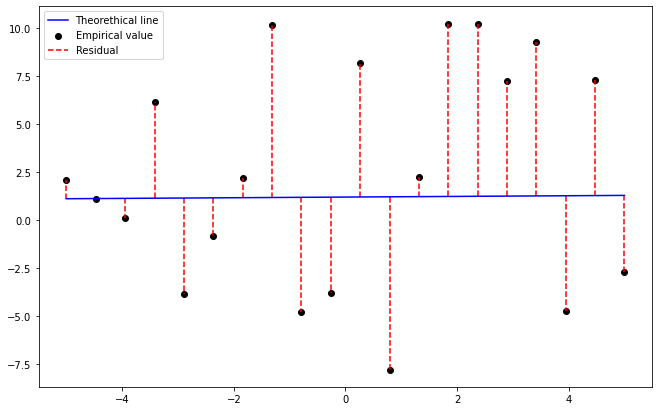

In [10]:
dy = y
fig, ax = plt.subplots()
ax.plot(x,lid_y, color = 'blue')
ax.scatter(x,lid_y+dy,color='black')
ax.vlines(x,lid_y,lid_y+dy, colors='r', linestyles='--')
ax.legend( ['Theorethical line', 'Empirical value', 'Residual'])
plt.show()